In [239]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pylab
import numpy as np

X, y = make_moons(n_samples=5000, random_state=42, noise=0.1)
X = np.append([[1 for _ in range(0,len(X))]], X.T,0).T
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.4)

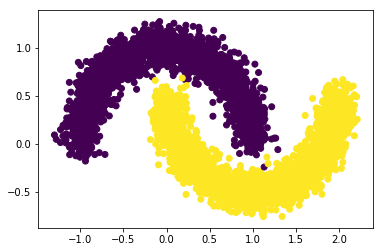

In [240]:
pylab.scatter(X[:,1], X[:,2], c=y)
pylab.show()

In [241]:
print(X_train.shape)

(3000, 3)


In [242]:
# There are only two features in the data X[:,0] and X[:,1]
n_feature = len(X[0])
# There are only two classes: 0 (purple) and 1 (yellow)
n_class = 2


def init_weights(n_hidden=100):
    # Initialize weights with Standard Normal random variables
    model = dict(
        W1=np.random.randn(n_feature, n_hidden),
        W2=np.random.randn(n_hidden, n_class)
    )

    return model


In [243]:
# Defines the softmax function. For two classes, this is equivalent to the logistic regression
def softmax(x):
    return np.exp(x) / np.exp(x).sum()

In [244]:
# For a single example $x$
def forward(x, model):
    # Input times first layer matrix 
    z_1 = x @ model['W1']

    # ReLU activation goes to hidden layer
    h = z_1
    h[z_1 < 0] = 0

    # Hidden layer values to output
    hat_y = softmax(h @ model['W2'])

    return h, hat_y


In [245]:
def backward(model, xs, hs, errs):
    """xs, hs, errs contain all information (input, hidden state, error) of all data in the minibatch"""
    # errs is the gradients of output layer for the minibatch
    dW2 = (hs.T @ errs)/xs.shape[0]

    # Get gradient of hidden layer
    dh = errs @ model['W2'].T
    dh[hs <= 0] = 0

    dW1 = (xs.T @ dh)/xs.shape[0]

    return dict(W1=dW1, W2=dW2)


In [246]:
def get_gradient(model, X_train, y_train):
    xs, hs, errs = [], [], []

    for x, cls_idx in zip(X_train, y_train):
        h, y_pred = forward(x, model)

        # Create one-hot coding of true label
        y_true = np.zeros(n_class)
        y_true[int(cls_idx)] = 1.

        # Compute the gradient of output layer
        err = y_true - y_pred

        # Accumulate the informations of the examples
        # x: input
        # h: hidden state
        # err: gradient of output layer
        xs.append(x)
        hs.append(h)
        errs.append(err)

    # Backprop using the informations we get from the current minibatch
    return backward(model, np.array(xs), np.array(hs), np.array(errs))

In [247]:
def gradient_step(model, X_train, y_train, learning_rate = 1e-1):
    grad = get_gradient(model, X_train, y_train)
    model = model.copy()

    # Update every parameters in our networks (W1 and W2) using their gradients
    for layer in grad:
        # Careful, learning rate should depend on mini-batch size
        model[layer] += learning_rate * grad[layer]

    return model

//TODO Change this

In [248]:
def gradient_descent(model, X_train, y_train, no_iter=10):

    minibatch_size = 50
    
    for iter in range(no_iter):
#         print('Iteration (epoch) {}'.format(iter))

        ## MINI-BATCH: Shuffles the training data to sample without replacement
        indices = list(range(0,X_train.shape[0]))
        np.random.shuffle(indices)
        X_train = X_train[indices,:]
        y_train = y_train[indices]

        for i in range(0, X_train.shape[0], minibatch_size):
            # Get pair of (X, y) of the current mini-batch
            X_train_mini = X_train[i:i + minibatch_size]
            y_train_mini = y_train[i:i + minibatch_size]

            model = gradient_step(model, X_train_mini, y_train_mini, learning_rate = 1e-1)

    return model

In [249]:
no_iter = 10

# Reset model
model = init_weights()

# Train the model
model = gradient_descent(model, X_train, y_train, no_iter=no_iter)

y_pred = np.zeros_like(y_test)

accuracy = 0

for i, x in enumerate(X_test):
    # Predict the distribution of label
    _, prob = forward(x, model)
    # Get label by picking the most probable one
    y = np.argmax(prob)
    y_pred[i] = y

    # Accuracy of predictions with the true labels and take the percentage
    # Because our dataset is balanced, measuring just the accuracy is OK
    accuracy = (y_pred == y_test).sum() / y_test.size

print('(Validation)Accuracy after {} iterations: {}'.format(no_iter,accuracy))

y_pred = np.zeros_like(y_train)

accuracy = 0

for i, x in enumerate(X_train):
    # Predict the distribution of label
    _, prob = forward(x, model)
    # Get label by picking the most probable one
    y = np.argmax(prob)
    y_pred[i] = y

    # Accuracy of predictions with the true labels and take the percentage
    # Because our dataset is balanced, measuring just the accuracy is OK
    accuracy = (y_pred == y_train).sum() / y_train.size
print('(Training)Accuracy after {} iterations: {}'.format(no_iter,accuracy))

(Validation)Accuracy after 10 iterations: 0.9965
(Training)Accuracy after 10 iterations: 0.9993333333333333


In [250]:
pylab.scatter(X_test[:,1], X_test[:,2], c=y_pred)
# pylab.show()
pylab.savefig("new_out.png")

ValueError: Invalid RGBA argument: 1

In [188]:
no_iter = 100
no_runs = 20

accuracies = np.zeros(no_runs)

for run in range(no_runs):
    print("Run {}".format(run))
    # Reset model
    model = init_weights()

    # Train the model
    model = gradient_descent(model, X_train, y_train, no_iter=no_iter)

    y_pred = np.zeros_like(y_test)
    
    for i, x in enumerate(X_test):
        # Predict the distribution of label
        _, prob = forward(x, model)
        # Get label by picking the most probable one
        y = np.argmax(prob)
        y_pred[i] = y

        # Accuracy of predictions with the true labels and take the percentage
        # Because our dataset is balanced, measuring just the accuracy is OK
        accuracies[run]= (y_pred == y_test).sum() / y_test.size
print(accuracies)
print('Mean accuracy over test data: {}, std: {}'.format(accuracies.mean(), accuracies.std()))

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
[ 0.99666667  0.99733333  0.99733333  0.99733333  0.99733333  0.99666667
  0.99733333  0.99666667  0.99666667  0.99666667  0.99666667  0.99666667
  0.99666667  0.99733333  0.99733333  0.99733333  0.99666667  0.99666667
  0.99666667  0.99666667]
Mean accuracy over test data: 0.9969333333333333, std: 0.00032659863237105444
